In [ ]:
!pip install vnstock alpha_vantage

In [ ]:
# import vnstock as vns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from vnstock import Vnstock
from datetime import datetime, timedelta

stock = Vnstock().stock(symbol='VCI', source='VCI')
def get_stock_history(symbol, delta, interval):
    end = datetime.today().strftime('%Y-%m-%d')
    start = (datetime.today() - timedelta(days=delta)).strftime('%Y-%m-%d')

    stock = Vnstock().stock(symbol=symbol)
    return stock.quote.history(start=start, end=end, interval=interval)

df = get_stock_history('FPT', 5000, '1m')
df

,time,open,high,low,close,volume
0,2023-09-11 09:15:00,84.65,84.91,84.65,84.91,250100
1,2023-09-11 09:16:00,84.91,85.34,84.91,84.91,55100
2,2023-09-11 09:17:00,84.91,84.91,84.65,84.65,10300
3,2023-09-11 09:18:00,84.73,84.82,84.48,84.48,27000
4,2023-09-11 09:19:00,84.48,84.56,84.39,84.48,13800
...,...,...,...,...,...,...
86742,2024-12-06 09:54:00,148.70,148.90,148.70,148.90,8900
86743,2024-12-06 09:55:00,148.90,148.90,148.60,148.60,20300
86744,2024-12-06 09:56:00,148.60,148.70,148.60,148.70,19400
86745,2024-12-06 09:57:00,148.70,148.70,148.50,148.50,54700


In [ ]:
from datetime import datetime
import time
import pandas as pd

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = 'B9BHGIKFEJEVJXOJ' #outdated api
symbol = 'FPT'  # Example: Apple Inc.
interval = '1min'  # Time interval between data points

# Function to fetch data for a specific month
def fetch_monthly_data(year, month):
    month_str = f"{year}-{month:02d}"
    url = (
        f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY"
        f"&symbol={symbol}&interval={interval}&month={month_str}"
        f"&outputsize=full&apikey={api_key}&datatype=csv"
    )
    df = pd.read_csv(url)
    print(df.head())
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    return df

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Define the starting point: December 2024
start_year = 2024
start_month = 12

# Get current year and month
now = datetime.now()
current_year = now.year
current_month = now.month

# 1. Fetch data for December 2024 (if current_year is 2025 or later)
if current_year > start_year or (current_year == start_year and current_month >= start_month):
    print(f"Fetching data for {start_year}-{start_month:02d}")
    try:
        monthly_data = fetch_monthly_data(start_year, start_month)
        all_data = pd.concat([all_data, monthly_data])
    except Exception as e:
        print(f"Error fetching data for {start_year}-{start_month:02d}: {e}")
    time.sleep(12)  # Respect API rate limits

# 2. Fetch data for the current year (from January up to the current month)
if current_year >= start_year + 1:
    for month in range(1, current_month + 1):
        print(f"Fetching data for {current_year}-{month:02d}")
        try:
            monthly_data = fetch_monthly_data(current_year, month)
            all_data = pd.concat([all_data, monthly_data])
        except Exception as e:
            print(f"Error fetching data for {current_year}-{month:02d}: {e}")
        time.sleep(12)  # Respect API rate limits

# Reset index and sort data by timestamp
all_data.reset_index(drop=True, inplace=True)
all_data.sort_values(by='timestamp', inplace=True)

# Display the first few rows of the collected data
all_data.head()

Fetching data for 2024-12
                                                   {
0      "Information": "We have detected your API ...
1                                                  }
Error fetching data for 2024-12: 'timestamp'
Fetching data for 2025-01
                                                   {
0      "Information": "We have detected your API ...
1                                                  }
Error fetching data for 2025-01: 'timestamp'
Fetching data for 2025-02
                                                   {
0      "Information": "We have detected your API ...
1                                                  }
Error fetching data for 2025-02: 'timestamp'
Fetching data for 2025-03
                                                   {
0      "Information": "We have detected your API ...
1                                                  }
Error fetching data for 2025-03: 'timestamp'
Fetching data for 2025-04
                                                   {
0

KeyError: 'timestamp'

In [ ]:
#CONCAT HISTORY FROM VNSTOCK AND ALPHA VANTAGE

In [ ]:
df = df.dropna()
df

,time,open,high,low,close,volume
0,2023-09-11 09:15:00,84.65,84.91,84.65,84.91,250100
1,2023-09-11 09:16:00,84.91,85.34,84.91,84.91,55100
2,2023-09-11 09:17:00,84.91,84.91,84.65,84.65,10300
3,2023-09-11 09:18:00,84.73,84.82,84.48,84.48,27000
4,2023-09-11 09:19:00,84.48,84.56,84.39,84.48,13800
...,...,...,...,...,...,...
86742,2024-12-06 09:54:00,148.70,148.90,148.70,148.90,8900
86743,2024-12-06 09:55:00,148.90,148.90,148.60,148.60,20300
86744,2024-12-06 09:56:00,148.60,148.70,148.60,148.70,19400
86745,2024-12-06 09:57:00,148.70,148.70,148.50,148.50,54700


In [ ]:
df = df['close']
df

,close
0,84.91
1,84.91
2,84.65
3,84.48
4,84.48
...,...
86742,148.90
86743,148.60
86744,148.70
86745,148.50


In [ ]:
length_data = len(df)
length_train = round(length_data * 0.6)
length_validation = round(length_data * 0.2)
length_test = length_data - length_train - length_validation

#Validation set is for tuning parameters and test set is for actual testing

In [ ]:
train_data = df[:length_train]
validation_data = df[length_train:length_train+length_validation]
test_data = df[length_train+length_validation:]

In [ ]:
train_data = train_data.to_frame()
validation_data = validation_data.to_frame()
test_data = test_data.to_frame()

In [ ]:
df_train = train_data.values

In [ ]:
df_train = np.reshape(df_train, (-1,1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

df_train_scaled = scaler.fit_transform(df_train)

df_train_scaled.shape

(52048, 1)

In [ ]:
X_train = []
y_train = []

time_step = 200

for i in range(time_step, length_train):
    X_train.append(df_train_scaled[i-time_step:i,0])
    y_train.append(df_train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, LSTM
from keras.layers import Dropout

# keras.utils.set_random_seed(622)

unit_num = 256
hidden_layers = 1
# initializing the RNN
regressor = Sequential()


for i in range(hidden_layers - 1):
    regressor.add(
        LSTM(units = unit_num,
                activation = "tanh",
                return_sequences = True,
                )
                )

    regressor.add(
        Dropout(0.2)
                )


regressor.add(
    LSTM(units = unit_num)
             )

regressor.add(
    Dropout(0.2)
             )
# regressor.add(Dense(units = 25))

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_absolute_error",
    metrics = ["mean_absolute_error"])


In [ ]:
# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 30, batch_size = 4096)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 515ms/step - loss: 0.2271 - mean_absolute_error: 0.2271
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 517ms/step - loss: 0.0376 - mean_absolute_error: 0.0376
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 520ms/step - loss: 0.0220 - mean_absolute_error: 0.0220
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 524ms/step - loss: 0.0159 - mean_absolute_error: 0.0159
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 530ms/step - loss: 0.0147 - mean_absolute_error: 0.0147
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 537ms/step - loss: 0.0139 - mean_absolute_error: 0.0139
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 541ms/step - loss: 0.0131 - mean_absolute_error: 0.0131
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 547ms/step - loss: 0.0128 - mean_absolute_error: 0.0128
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 553ms/step - loss: 0.0124 - mean_absolute_error: 0.0124
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 557ms/step - loss: 0.0121 - mean_absolute_error: 0.0121
Epoch 11/30
13/13 ━━

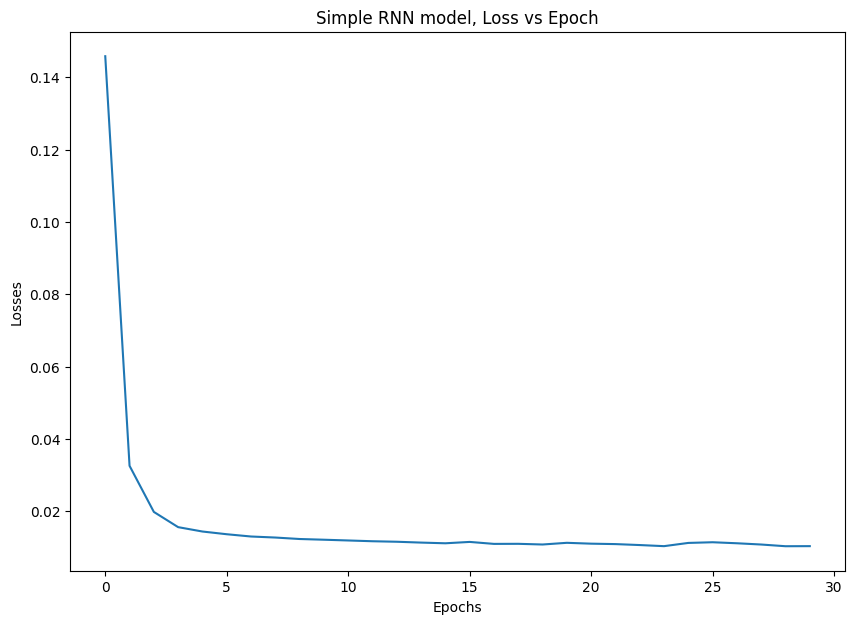

In [ ]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

In [ ]:
y_train_pred = regressor.predict(X_train)
y_train_pred = scaler.inverse_transform(y_train_pred)
y_train_pred.shape

1621/1621 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


(51848, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train)

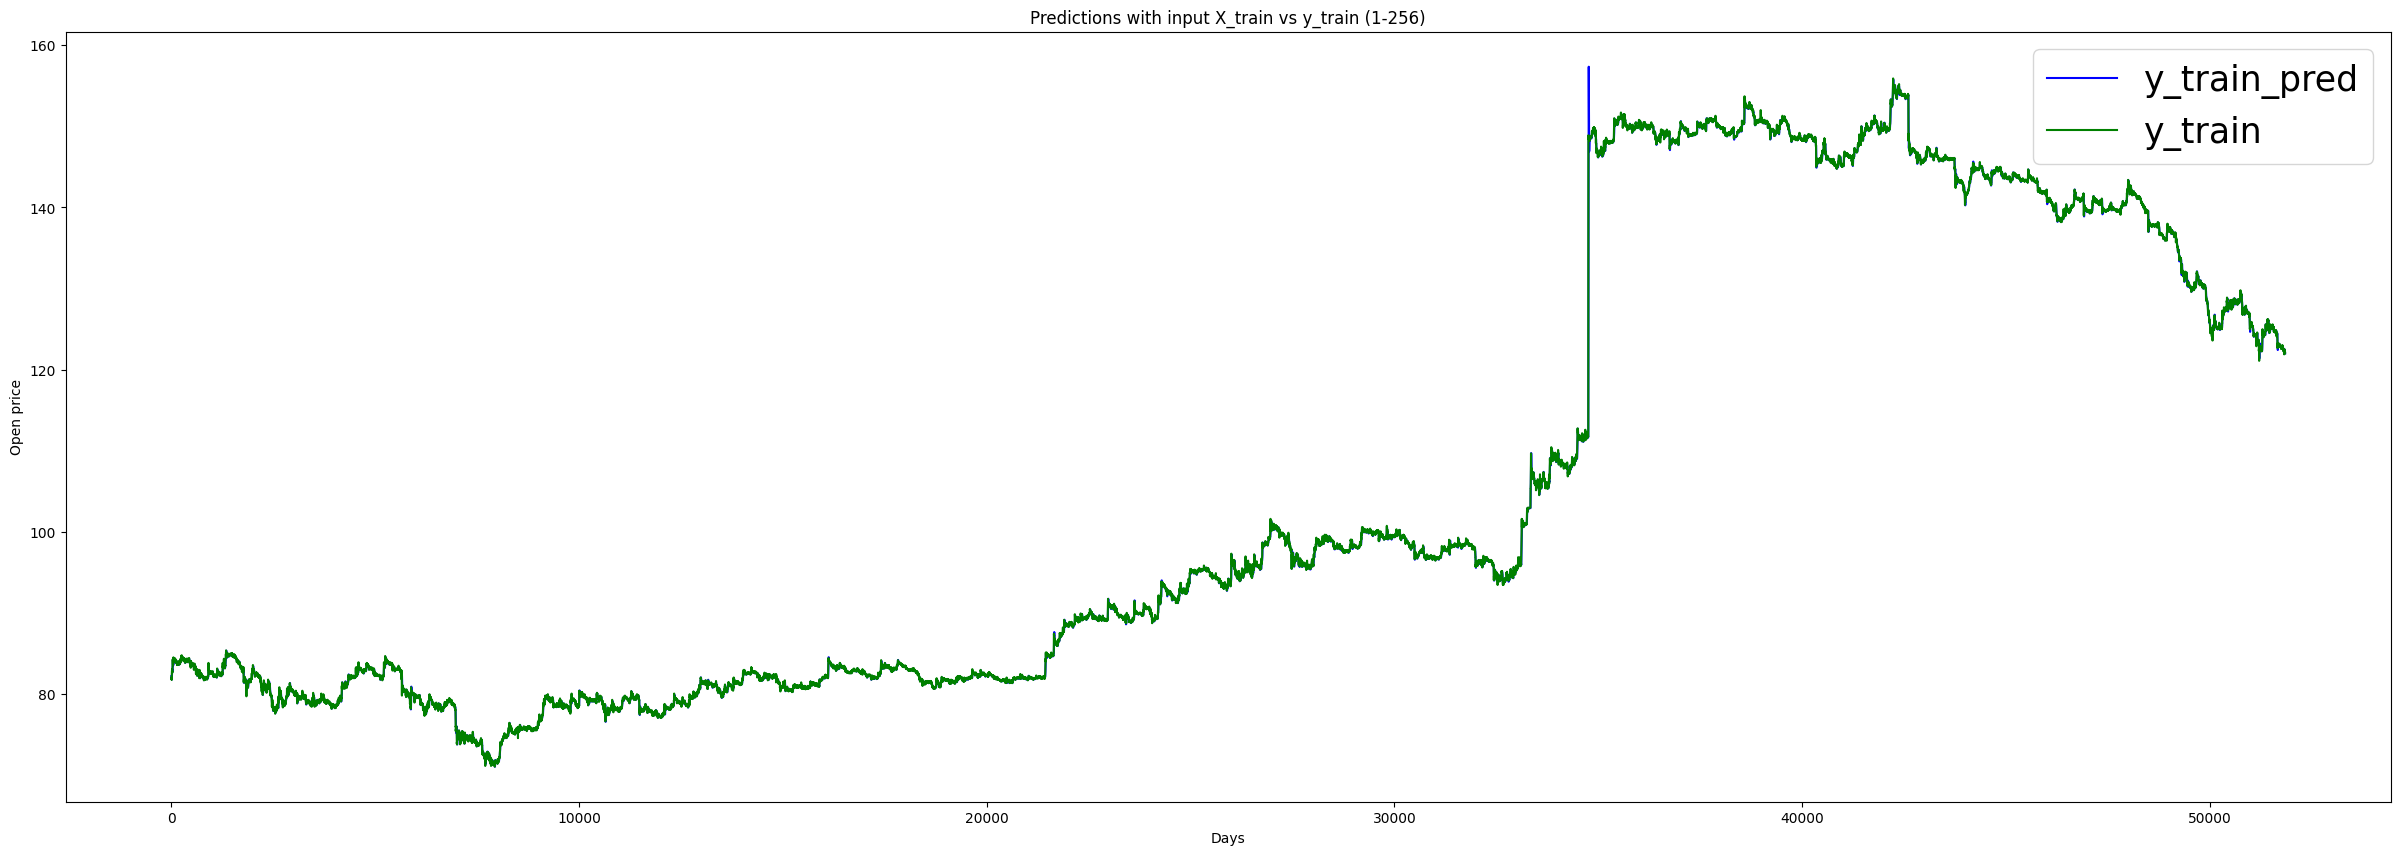

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(y_train_pred, color = "b", label = "y_train_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title(f"Predictions with input X_train vs y_train ({hidden_layers}-{unit_num})")
plt.legend(fontsize = 25)
plt.show()


In [ ]:
df_validation = validation_data.values
df_validation = np.reshape(df_validation, (-1,1))

scaled_df_validation =  scaler.transform(df_validation)



X_validation = []
y_validation = []

for i in range(time_step, length_validation):
    X_validation.append(scaled_df_validation[i-time_step:i,0])
    y_validation.append(scaled_df_validation[i,0])

X_validation, y_validation = np.array(X_validation), np.array(y_validation)

X_validation = np.reshape(X_validation, (X_validation.shape[0],X_validation.shape[1],1))
y_validation = np.reshape(y_validation, (-1,1))
y_validation = scaler.inverse_transform(y_validation)

In [ ]:
y_validation_pred = regressor.predict(X_validation)

y_validation_pred = scaler.inverse_transform(y_validation_pred)

y_validation_pred = pd.DataFrame(y_validation_pred, columns=['Close'])

536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


In [ ]:
train_data

,close
0,84.91
1,84.91
2,84.65
3,84.48
4,84.48
...,...
52043,122.10
52044,122.10
52045,122.10
52046,122.00


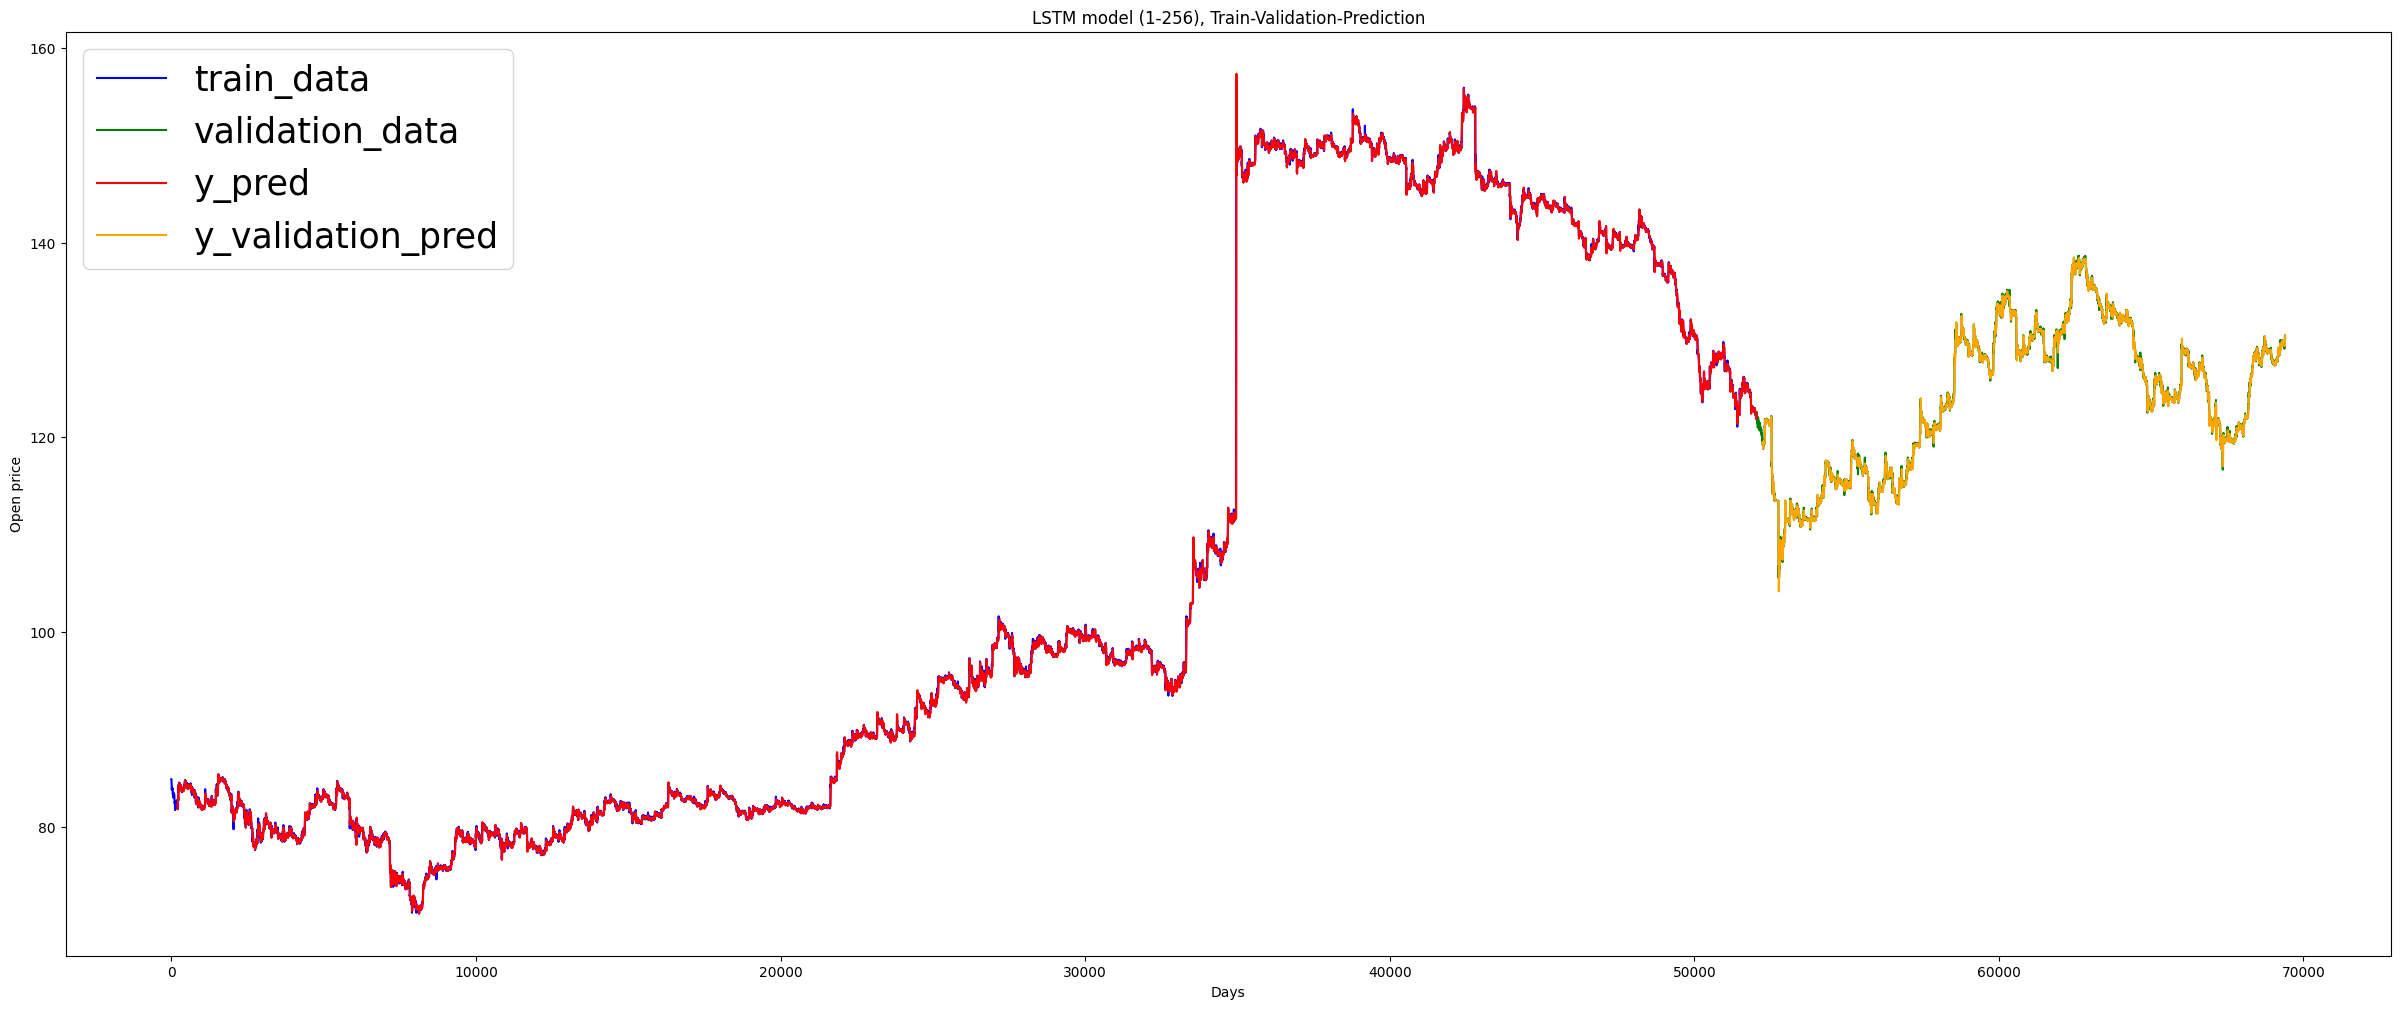

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.index, train_data['close'], label = "train_data", color = "b")
plt.plot(validation_data.index, validation_data['close'], label = "validation_data", color = "g")
plt.plot(train_data.index[time_step:], y_train_pred, label = "y_pred", color = "r")
plt.plot(validation_data.index[time_step:], y_validation_pred["Close"], label = "y_validation_pred", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title(f"LSTM model ({hidden_layers}-{unit_num}), Train-Validation-Prediction")
plt.legend(fontsize = 25)
plt.show()

In [ ]:
true_price = [i[0] for i in validation_data.values[time_step:]]
predicted_price = [i for i in y_validation_pred["Close"]]

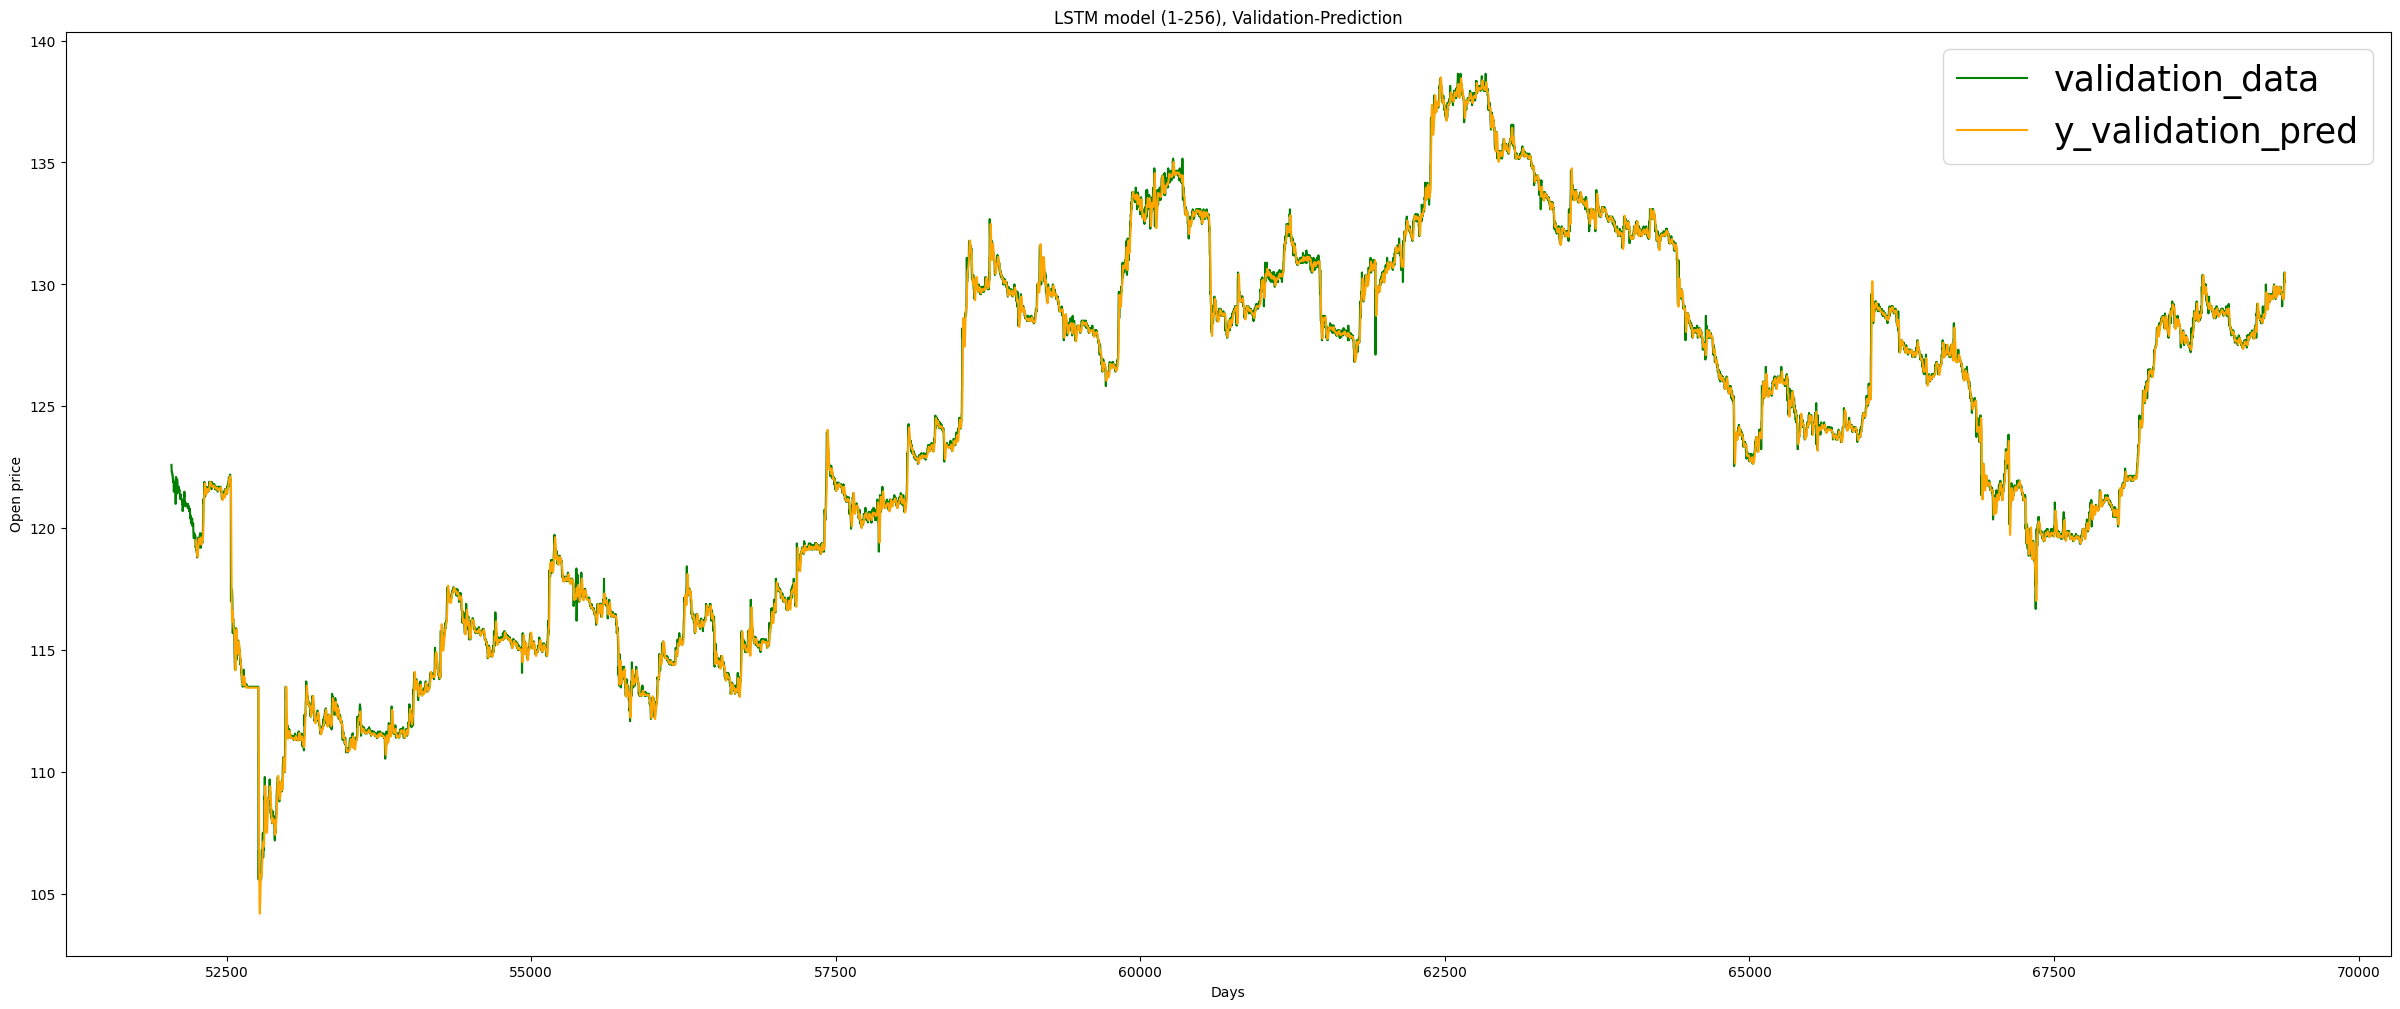

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(validation_data.index, validation_data['close'], label = "validation_data", color = "g")
plt.plot(validation_data.index[time_step:], y_validation_pred, label = "y_validation_pred", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title(f"LSTM model ({hidden_layers}-{unit_num}), Validation-Prediction")
plt.legend(fontsize = 25)
plt.show()

In [ ]:
mse = np.mean(np.square(np.array([true_price]) - np.array([predicted_price])))

# count = 0
# temp = 0
# Chạy vài lần rồi lấy trung bình


# count += 1
# temp += mse
# print(mse, count, temp/count)

mse

np.float64(0.09578259906066386)

# Test

In [ ]:
df_test = test_data.values
df_test = np.reshape(df_test, (-1,1))

scaled_df_test =  scaler.transform(df_test)

X_test = []
y_test = []

for i in range(time_step, length_test):
    X_test.append(scaled_df_test[i-time_step:i,0])
    y_test.append(scaled_df_test[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_test = np.reshape(y_test, (-1,1))
y_test = scaler.inverse_transform(y_test)

X_test.shape

(17150, 200, 1)

In [ ]:
y_test_pred = regressor.predict(X_test)

y_test_pred = scaler.inverse_transform(y_test_pred)

y_test_pred = pd.DataFrame(y_test_pred, columns=['Close'])

536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


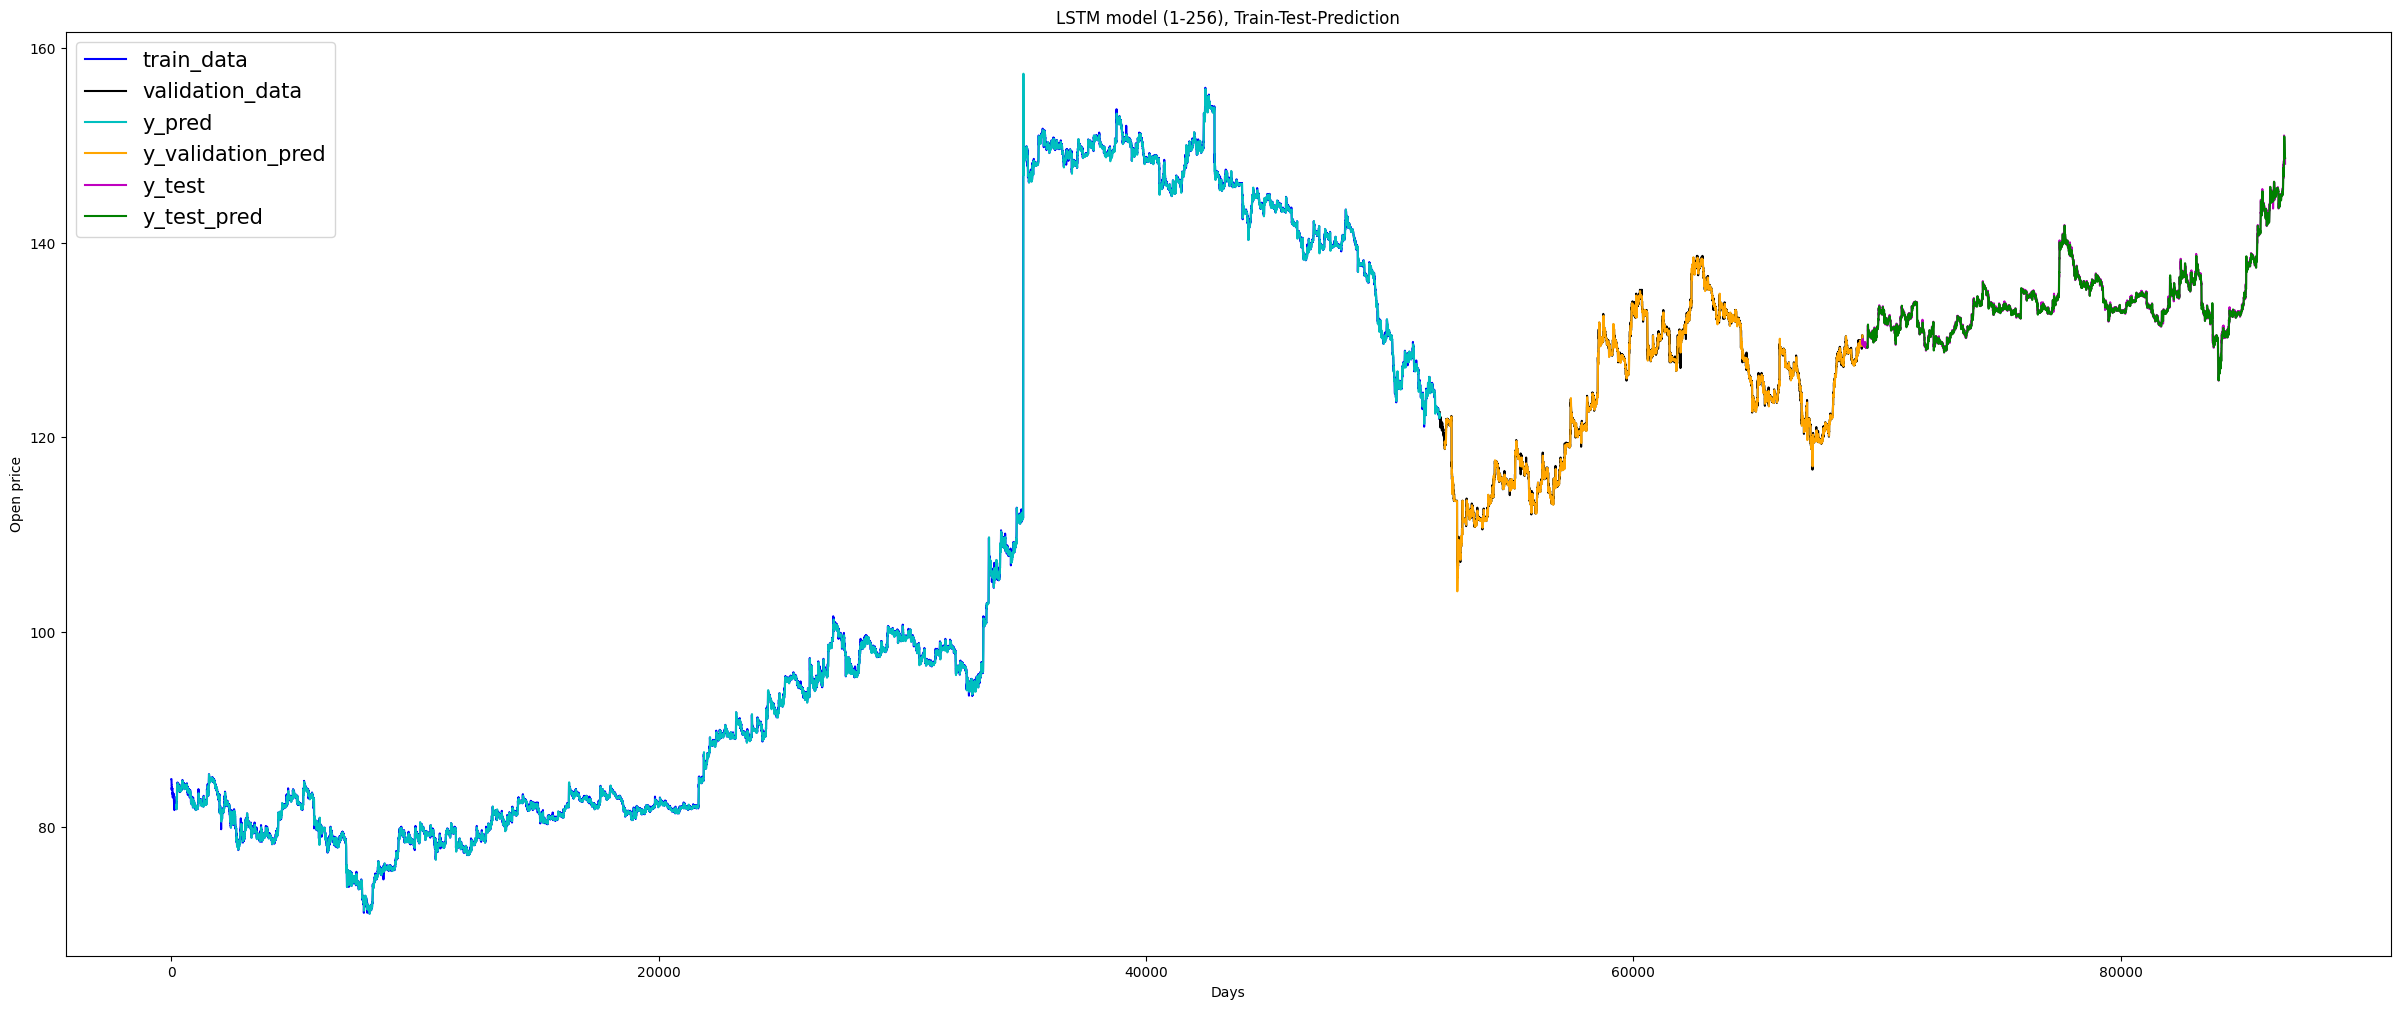

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.index, train_data['close'], label = "train_data", color = "b")
plt.plot(validation_data.index, validation_data['close'], label = "validation_data", color = "k")
plt.plot(train_data.index[time_step:], y_train_pred, label = "y_pred", color = "c")
plt.plot(validation_data.index[time_step:], y_validation_pred, label = "y_validation_pred", color = "orange")
plt.plot(test_data.index, test_data['close'], label = "y_test", color = "m")
plt.plot(test_data.index[time_step:], y_test_pred, label = "y_test_pred", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title(f"LSTM model ({hidden_layers}-{unit_num}), Train-Test-Prediction")
plt.legend(fontsize = 15)
plt.show()

In [ ]:
true_price_test = [i[0] for i in test_data.values[time_step:]]
predicted_price_test = [i for i in y_test_pred["Close"]]

In [ ]:
mse = np.mean(np.square(np.array([true_price_test]) - np.array([predicted_price_test])))
mse

np.float64(0.04383247661883378)

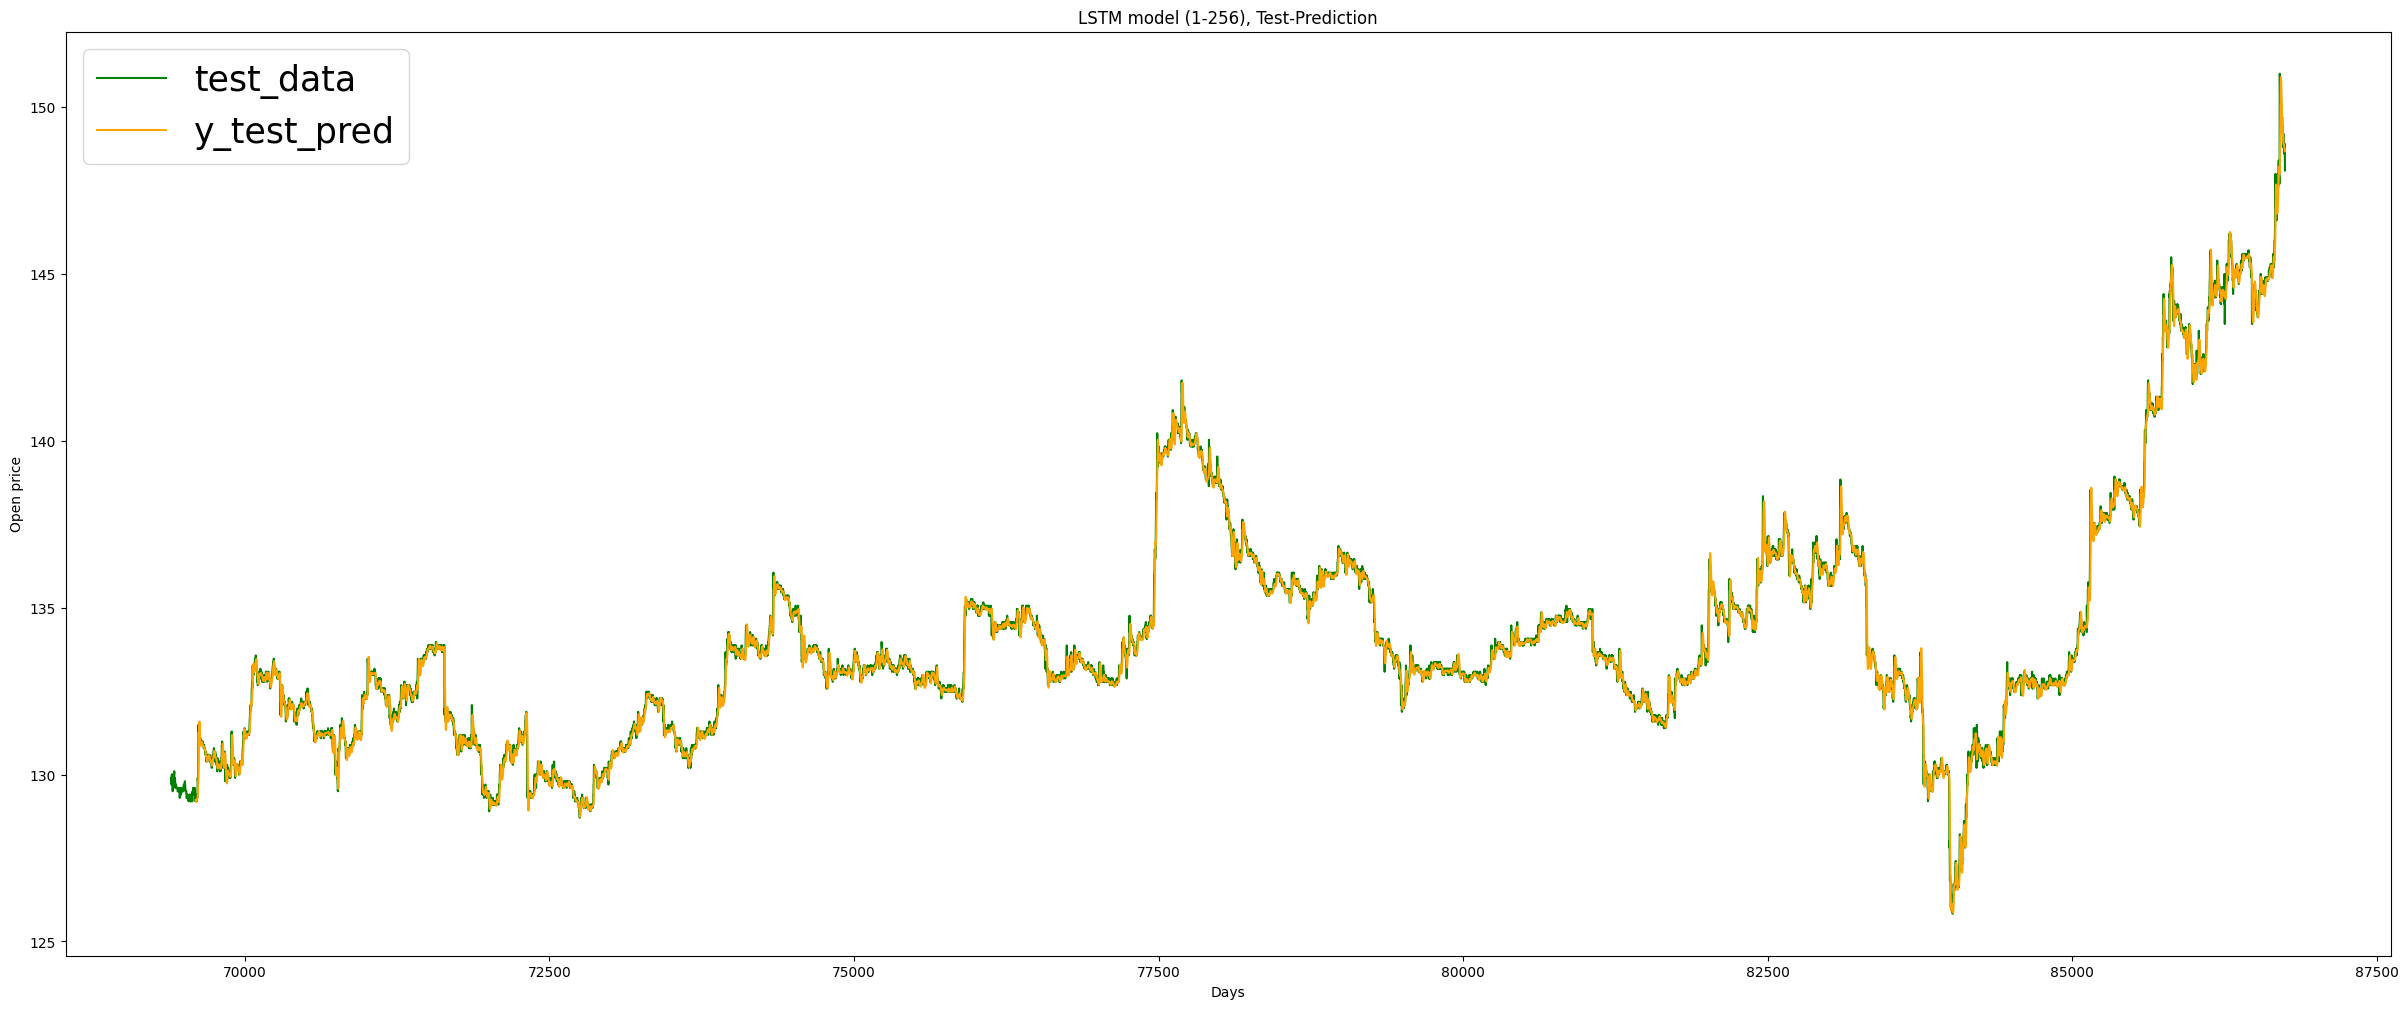

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(test_data.index, test_data['close'], label = "test_data", color = "g")
plt.plot(test_data.index[time_step:], y_test_pred, label = "y_test_pred", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title(f"LSTM model ({hidden_layers}-{unit_num}), Test-Prediction")
plt.legend(fontsize = 25)
plt.show()

# Continue predicting

In [ ]:
# Number of future predictions you want
n_future = 5 # 5 min prediction

# Start with the last 'time_step' values from the scaled test data
last_sequence = scaled_df_test[-time_step:]
future_predictions = []

for _ in range(n_future):
    # Reshape to (1, time_step, 1) to feed into the model
    X_input = last_sequence.reshape(1, time_step, 1)

    # Predict the next value (scaled)
    next_pred_scaled = regressor.predict(X_input)

    # Save the prediction (assume output shape is (1,1))
    future_predictions.append(next_pred_scaled[0, 0])

    # Update the sequence: remove the first element and append the new prediction
    last_sequence = np.append(last_sequence[1:], next_pred_scaled, axis=0)

# Convert list to array and reshape for inverse transform
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# Create a DataFrame for the predictions
future_predictions_df = pd.DataFrame(future_predictions, columns=['Close'])
print(future_predictions_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
         Close
0   148.599457
1   148.522888
2   148.461456
3   148.412247
4   148.371597
5   148.337051
6   148.306824
7   148.279755
8   148.254974
9   148.231934
10  148.210190
11  148.189468


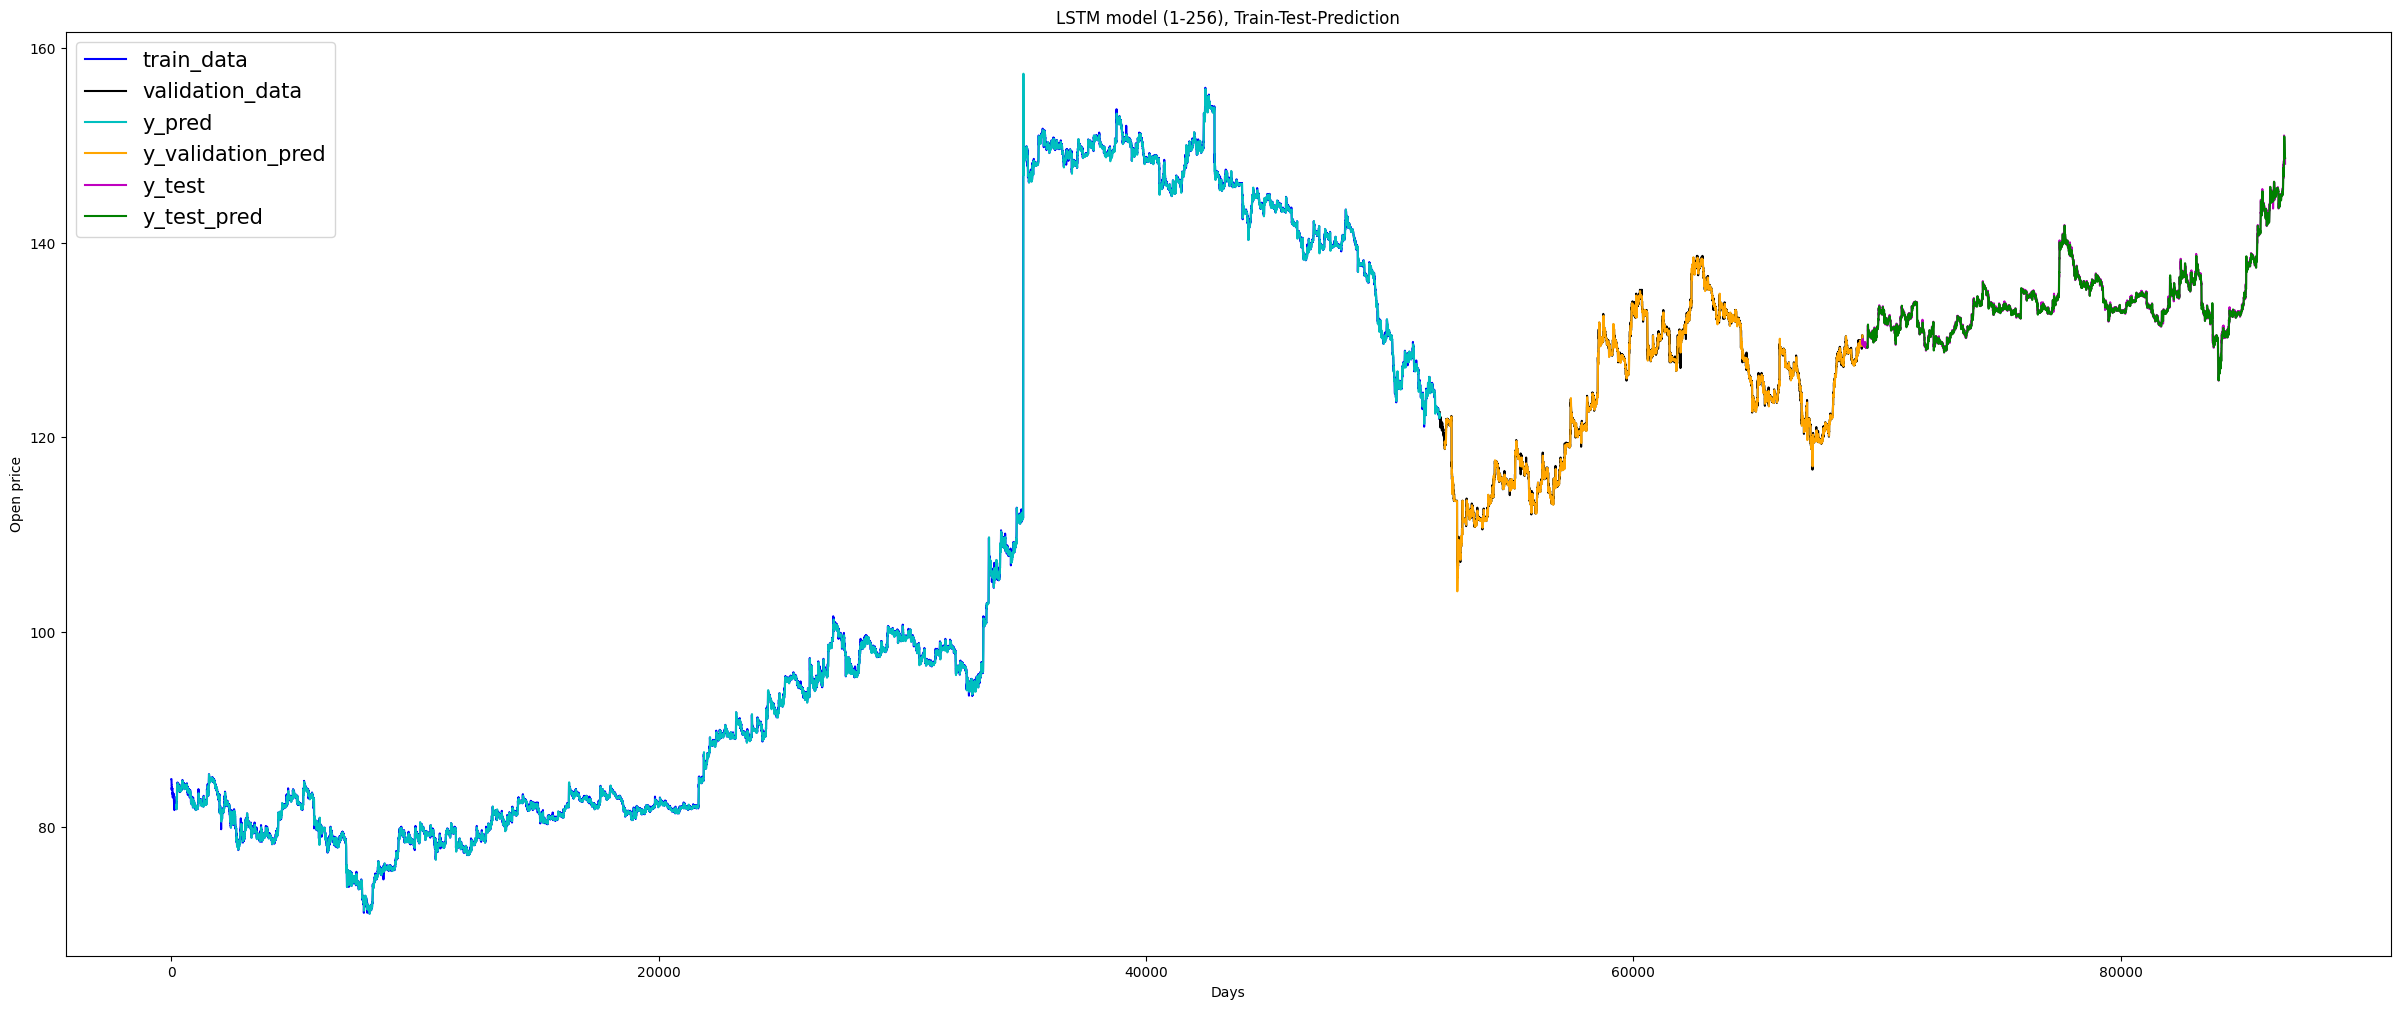

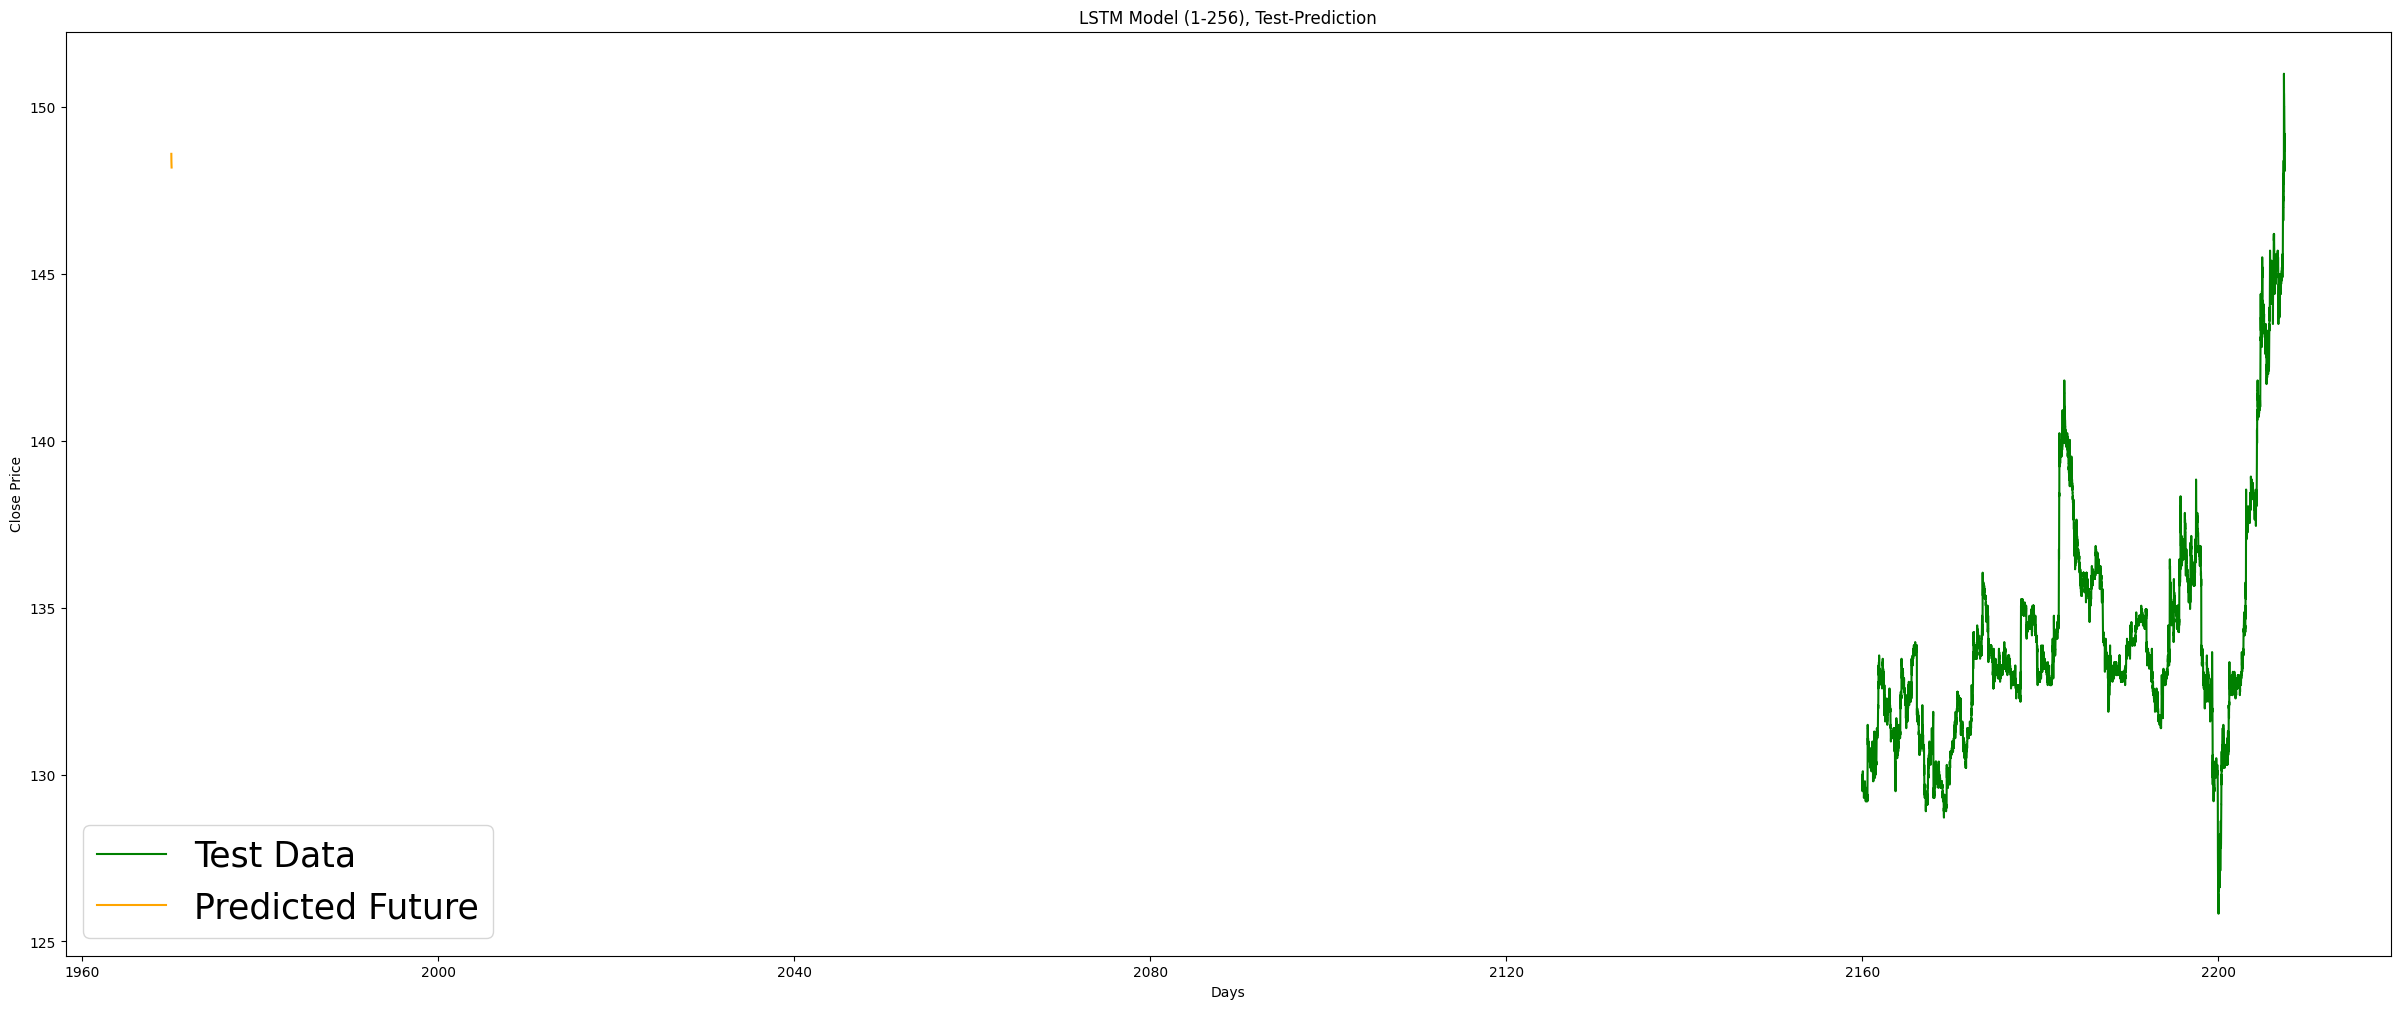

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.index, train_data['close'], label = "train_data", color = "b")
plt.plot(validation_data.index, validation_data['close'], label = "validation_data", color = "k")
plt.plot(train_data.index[time_step:], y_train_pred, label = "y_pred", color = "c")
plt.plot(validation_data.index[time_step:], y_validation_pred, label = "y_validation_pred", color = "orange")
plt.plot(test_data.index, test_data['close'], label = "y_test", color = "m")
plt.plot(test_data.index[time_step:], y_test_pred, label = "y_test_pred", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title(f"LSTM model ({hidden_layers}-{unit_num}), Train-Test-Prediction")
plt.legend(fontsize = 15)
plt.show()

# Create future index based on the last available date in test_data
future_index = pd.date_range(start=test_data.index[-1], periods=n_future + 1, freq="D")[1:]

plt.figure(figsize=(30, 12))

# Plot actual test data
plt.plot(test_data.index, test_data['close'], label="Test Data", color="g")

# Plot predicted future values
plt.plot(future_index, future_predictions_df['Close'], label="Predicted Future", color="orange")

plt.xlabel("Days")
plt.ylabel("Close Price")
plt.title(f"LSTM Model ({hidden_layers}-{unit_num}), Test-Prediction")
plt.legend(fontsize=25)
plt.show()